### GitHub repository
Link to repository used to colaborate on the assignment:
https://github.com/KarolineKlan/Assignments_ComSocSci2024.git

### Contribution statement

Team members:

- Jacob (s214596)
- Kristoffer (s214609)
- Karoline (s214638)

All members collaborated and contributed to every part of the assignment.

# Assignment 2

In [2]:
#Import relevant libraries
import json
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np

## Part 1: Properties of the real-world network of Computational Social Scientists
In this part of the assignment we are analyzing the CSS-network by comparing with a Random Model.

### 1.1 The random model
Building a random model from the CSS-network 

In [3]:
#load the CSS-network that was created in assignment 1
def load_network_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
        G = nx.node_link_graph(data)
    return G

file_path = 'data/network_with_attributes.json'
G = load_network_from_json(file_path)


print(f'The number of nodes in G is {G.number_of_nodes()} and the amount of edges are {G.number_of_edges()}')
print(f'The denisty of G is {nx.density(G)}')
print(f'Is the graph fully connected: {nx.is_connected(G)}')

The number of nodes in G is 8478 and the amount of edges are 23778
The denisty of G is 0.0006617130855140186
Is the graph fully connected (not disconnected): False


We calculate p and k for the CSS-network using equation 3.2 from the network science text-book [1]


In [5]:
N = G.number_of_nodes() #8478
L = G.number_of_edges() #23778

p = 2*L/(N*(N-1)) 

#calculate the average degree using p
k = p*(N-1)
print(f'Average degree of the CSS-network: {k}')

Average degree of the CSS-network: 5.6093418259023355


In [17]:
#CHECK LIGE OM EN AF JER ANDRES FUNKTIONER ER BEDRE!
#function to calculate generate random network:
def generate_random_network(node_count, probability):
    random_network = nx.Graph()
    nodes = range(node_count)
    random_network.add_nodes_from(nodes)

    for i in nodes:
        for j in nodes:
            if i < j:
                if np.random.uniform(0, 1) < probability:
                    random_network.add_edge(i, j)

    return random_network

# Generate random network
random_network = generate_random_network(N, p)



In [25]:
# Print some information about the generated random network
print(f'The number of nodes in G is {random_network.number_of_nodes()} and the amount of edges are {random_network.number_of_edges()}')
print(f'The denisty of G is {nx.density(random_network)}')
print(f'Is the graph fully connected: {nx.is_connected(random_network)}')
print(f'The average degree of the random network is {np.mean([degree for node, degree in random_network.degree()])}')

The number of nodes in G is 8478 and the amount of edges are 23919
The denisty of G is 0.0006656369455971827
Is the graph fully connected (not disconnected): False
The average degree of the random network is 5.642604387827317


In [34]:
network, config = nw.visualize(random_network, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('Random network')

OSError: [Errno 48] Address already in use

Text(0.5, 1.0, 'CSS-network')

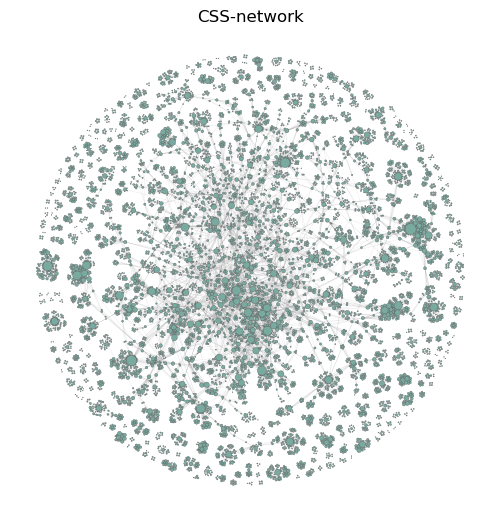

In [31]:
network, config = nw.visualize(G, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('CSS-network')

> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

### Questions about the regime of the random network

**What regime does it fall into:** 

The average degree of our the random network < k > = 5.6 which is above the critical threshold of < k > = 1, meaning that a substantial portion of the network is connected. Since the average degree does not fall above log(N)=9 we are not in a fully connected regime, but we fall in the category of the Supercritical Regime.

**The networks structure:**

 In the supercritial regime the network begins to exhibit characteristics resembling those found in actual networks. The supercritical regime is characterized by the coexistence of multiple isolated components along with the giant component. In this regime, smaller components tend to resemble trees, whereas the giant component is characterized by the presence of loops and cycles in the connections. [1] 

**Differences:**

In the real CSS-network, connections may be more unevenly distributed, leading to regions of sparse connectivity and regions with denser connectivity, and specific structural patterns, such as communities and hubs. In the random network the connection tends to have a more uniform distribution, being very dense in the middle and more sparse in the "edges". This aligns with the expectations since Real-world networks often evolve through complex processes and the random network, being uniformly generated, lack the complex structural patterns.

### 1.2 Degree distribution

In [21]:
# Obtain the degrees of all nodes in the random network and CSS-network
Normal_degrees = [degree for node, degree in random_network.degree()]
CSS_degrees = [degree for node, degree in G.degree()]   


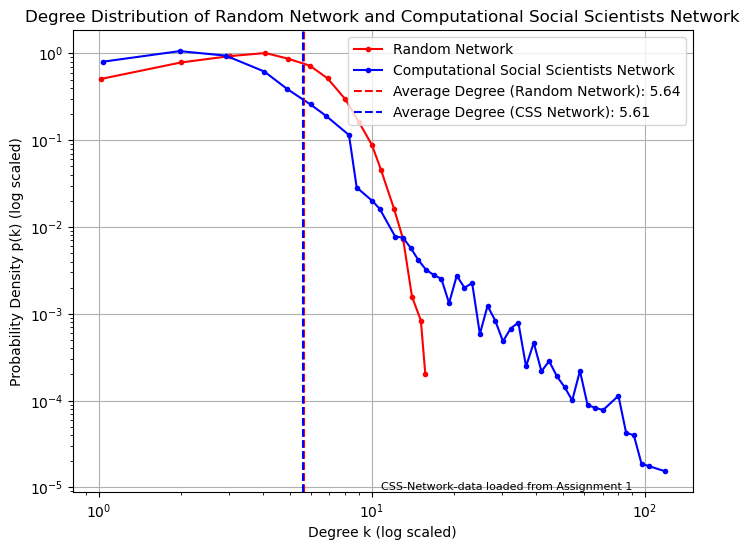

In [30]:
#Visualize the degree distribution of the random network and the CSS-network
# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Define bins using logspace for logarithmic scaling
bins_norm = np.logspace(0, np.log10(max(Normal_degrees)), 75)
bins_css = np.logspace(np.log10(min(CSS_degrees)), np.log10(max(CSS_degrees)), 75)

# define the degree distribution of the random network
hist_normal, edges_normal = np.histogram(Normal_degrees, bins=bins_norm, density=True)
x_norm = (edges_normal[1:] + edges_normal[:-1]) / 2

# Filter empty bins
xx_norm, yy_norm = zip(*[(i, j) for (i, j) in zip(x_norm, hist_normal) if j > 0])

# define the degree distribution of the Computational Social Scientists network
hist_css, edges_css = np.histogram(CSS_degrees, bins=bins_css, density=True)
x_css = (edges_css[1:] + edges_css[:-1]) / 2

# Filter empty bins
xx_css, yy_css = zip(*[(i, j) for (i, j) in zip(x_css, hist_css) if j > 0])

# Plot them
ax.plot(xx_norm, yy_norm, marker='.', label='Random Network', color='r')
ax.plot(xx_css, yy_css, marker='.', label='Computational Social Scientists Network', color='b')

# Calculate average degree for both networks
avg_degree_random = np.mean(Normal_degrees)
avg_degree_css = np.mean(CSS_degrees)

# Add vertical lines for average degrees
ax.axvline(avg_degree_random, color='r', linestyle='--', label=f'Average Degree (Random Network): {avg_degree_random:.2f}')
ax.axvline(avg_degree_css, color='b', linestyle='--', label=f'Average Degree (CSS Network): {avg_degree_css:.2f}')

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Degree k (log scaled)')
ax.set_ylabel('Probability Density p(k) (log scaled)')
ax.set_title('Degree Distribution of Random Network and Computational Social Scientists Network')
ax.legend()

# Show grid
ax.grid(True) 

 
data_source = "CSS-Network-data loaded from Assignment 1" 
plt.text(0.7, 0.0, data_source, ha='center', va='bottom', transform=ax.transAxes, fontsize=8)

# Show the plot
plt.show()


#### Questions:
> * Answer the following questions: 
>    - Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.
>    - What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties?

** ANSWER QUESTIONS BETTER HERE **

We can see that the CSS network is approximately a straight line in log-log-scale meaning it ia obviously a heavy tailed distribution. The mean of the two networks are approximately almost idential, meaning that average is not a meaningful measure when handeling heavy tailed distributions, as they can be misleading

## Part 2 Network Analysis in Computational Social Science
In this part of the assignment we are analyzing the CSS-network by looking at assortativity

### 2.1 Assortativity Coefficient

### 2.2 Configuration model

### 2.3 Analyzing Assortativity in Random Network

### 2.4 Assortativity by Degree

### 2.5 Reflection questions 

> 7. *Assortativity by degree.* Were the results of the degree assortativity in line with your expectations? Why or why not?    
> 8. *Edge flipping.* In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing *e_1* from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?    
> 9. *Distribution of assortativity in random networks.* Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations. 

### Central nodes

## Part 3 - Words that characterize Computational Social Science communities

# References

[1] http://networksciencebook.com/chapter/3